# Importing Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

# Data Visualization and Flattening

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

NameError: name 'keras' is not defined

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [2]:
plt.matshow(x_train[0])

NameError: name 'plt' is not defined

In [ ]:
y_train[0]

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Before Flattening
print("Before Flattening: ", x_train.shape)

Before Flattening:  (60000, 28, 28)


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
print("After Flattening :",x_train_flattened.shape)

After Flattening : (60000, 784)


In [ ]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

# Creating Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation= "sigmoid")
])
# Dense == All the elements in the present layer are connected to every other element in next layer
# Sequential Means our network is having stack of layers so it accepts every layer as one element first element is input

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # categorical = our output is a classification type 0 to 9
    # sparse = our output variable is as integer array like (0,1,2,3...)
    metrics = ["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4757 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9252


# Evaluating Test Data Set

In [ ]:
y_test_pred = model.predict(x_test_flattened)
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9265


[0.2666756212711334, 0.9265000224113464]

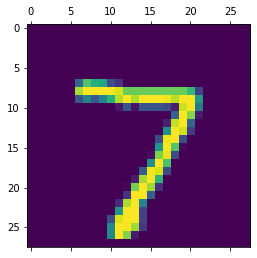

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_test_pred[0]

array([1.75016932e-02, 3.41569546e-07, 5.73094822e-02, 9.41547275e-01,
       2.03747395e-03, 1.07580334e-01, 2.08143524e-06, 9.99711454e-01,
       9.51468050e-02, 6.46870136e-01], dtype=float32)

In [ ]:
np.argmax(y_test_pred[0]) #list(y_test_pred[0]).index(max(y_test_pred[0]))

7

In [ ]:
y_test[0]

7

In [ ]:
y_test_predictions = [np.argmax(i) for i in y_test_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test_predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    3,    2,    0,    8,   13,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  933,   10,    5,    3,   14,   10,   40,    5],
       [   1,    1,   24,  901,    0,   29,    3,   11,   29,   11],
       [   1,    1,    7,    0,  896,    0,   12,    4,    9,   52],
       [   6,    3,    3,   20,    8,  786,   15,    5,   37,    9],
       [   7,    3,    6,    0,    7,   11,  917,    2,    5,    0],
       [   1,    5,   26,    2,    5,    0,    0,  947,    2,   40],
       [   4,    9,    6,   12,    8,   20,   10,   11,  883,   11],
       [   8,    7,    2,    7,   14,    5,    0,   16,    9,  941]])>

In [ ]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

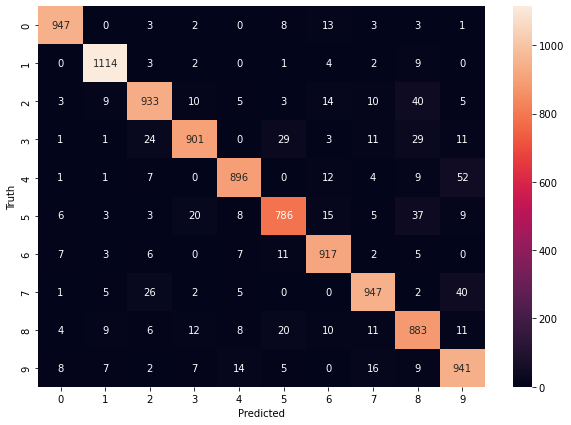

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')